In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

#### Расчет производных первого и второго порядков

In [7]:
def calcDf(f_values, h, p = 1):
    if p == 1:
        return (f_values[1:] - f_values[:-1]) / h
    elif p == 2:
        return (f_values[2:] - f_values[:-2]) / (2 * h)
    else:
        print("Порядок производной не 1 или 2")

def calcDDf(f_values, h):
    return (f_values[2:] - 2 * f_values[1:-1] + f_values[:-2]) / h**2

#### Проверка зависимости ошибки от мелкости разбиения

In [25]:
def f(x):
    return 1 / (1 + x) # return np.sin(x**2)

def df(x):
    return -1 / (1 + x)**2 # return 2*x*np.cos(x**2)

def ddf(x):
    return 2 / (1 + x)**3 #return 2*np.cos(x**2)-2*x**2*np.sin(x**2)

x_start, x_end = 1, 4
h_values = [0.5 / (2**i) for i in range(22)]

errors_first_1 = []
errors_first_2 = []
errors_second = []


for h in h_values:

    x_values = np.arange(x_start, x_end + h, h)
    f_values = f(x_values)

    # Численные производные
    der1_1 = np.zeros_like(f_values)
    der1_2 = np.zeros_like(f_values)
    der2   = np.zeros_like(f_values)

    # Первая производная (1-й порядок)
    der1_1[:-1] = calcDf(f_values, h, p=1)
    der1_1[-1] = (f_values[-1] - f_values[-2]) / h  # На правом конце

    # Первая производная (2-й порядок)
    der1_2[1:-1] = calcDf(f_values, h, p=2)
    der1_2[0] = (-3*f_values[0] + 4*f_values[1] - f_values[2]) / (2*h)  # Левая граница
    der1_2[-1] = (3*f_values[-1] - 4*f_values[-2] + f_values[-3]) / (2*h)  # Правая граница

    # Вторая производная (2-й порядок)
    der2[1:-1] = calcDDf(f_values, h)
    der2[0] = (2*f_values[0] - 5*f_values[1] + 4*f_values[2] - f_values[3]) / h**2  # Левая граница
    der2[-1] = (2*f_values[-1] - 5*f_values[-2] + 4*f_values[-3] - f_values[-4]) / h**2  # Правая граница

    # Истинные значения производных
    true_d1 = df(x_values)
    true_d2 = ddf(x_values)

    errors_first_1.append(np.max(np.abs(der1_1 - true_d1)))
    errors_first_2.append(np.max(np.abs(der1_2 - true_d1)))
    errors_second.append(np.max(np.abs(der2 - true_d2)))

#### График зависимости ошибки от мелкости сетки

Наклон d1_1: 0.9927041719049197
Наклон d1_2: 1.947783176793415
Наклон d2_2: 2.0349385274528764


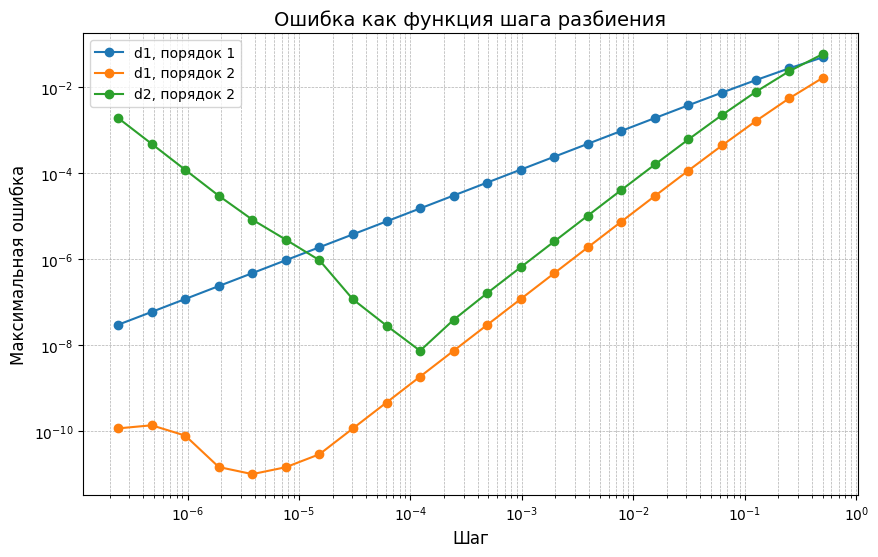

In [29]:
# определение коэффициента наклона графика
coefficients_first_deriv1 = np.polyfit(np.log(h_values), np.log(errors_first_1), 1)# 1 - это степень полинома (линейный)
coefficients_first_deriv2= np.polyfit(np.log(h_values)[0:17], np.log(errors_first_2)[0:17], 1)
coefficients_second_deriv = np.polyfit(np.log(h_values)[5:13], np.log(errors_second)[5:13], 1)

slope1_1, intercept1_1 = coefficients_first_deriv1
slope1_2, intercept1_2 = coefficients_first_deriv2
slope2, interceptq = coefficients_second_deriv

print(f"Наклон d1_1: {slope1_1}")
print(f"Наклон d1_2: {slope1_2}")
print(f"Наклон d2_2: {slope2}")


# Построение графиков ошибок
plt.figure(figsize=(10, 6))
plt.loglog(h_values, errors_first_1, 'o-', label="d1, порядок 1")
plt.loglog(h_values, errors_first_2, 'o-', label="d1, порядок 2")
plt.loglog(h_values, errors_second, 'o-', label="d2, порядок 2")

plt.xlabel("Шаг", fontsize=12)
plt.ylabel("Максимальная ошибка", fontsize=12)
plt.title("Ошибка как функция шага разбиения", fontsize=14)
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()